## Import and directories

In [2]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d20Feb17_60.5_635_A1_CuAzu655/';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d20Feb17_60.5_635_A1_CuAzu655/


In [3]:
#Import modules
import os.path
import glob
import os
import re
from xlwt import Workbook

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from numpy import sqrt, pi, exp, linspace, loadtxt

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py

In [7]:
os.chdir(parentdir)
!python analysis_version_6.py
%run analysis_version_6.py

### Figure Parameters

In [5]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## List of Points

### S104d20Feb17_60.5_635_A1_CuAzu655

In [21]:
S104d20Feb17_A1_Cu = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d20Feb17_60.5_635_A1_CuAzu655'
# point_list(foldername=S104d20Feb17_A1_Cu)

### S104d21Feb17_60.5_635_A1_CuAzu655

In [28]:
S104d21Feb17_A1_Cu = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d21Feb17_60.5_635_A1_CuAzu655/'
# point_list(foldername=S104d21Feb17_A1_Cu)

### S104d21Feb17_60.5_635_A2_CuAzu655

In [29]:
S104d21Feb17_A2_Cu = r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S104d21Feb17_60.5_635_A2_CuAzu655'
point_list(foldername=S104d21Feb17_A2_Cu)

,Point_1,Point_2,Point_4,Point_5,Point_6,Point_8,Point_9
0,10,10,10.0,10,10,10,100
1,10,10,10.0,100,10,10,
2,100,100,25.0,,25,100,
3,,,30.0,,30,,
4,,,40.0,,40,,
5,,,45.0,,50,,
6,,,50.0,,75,,
7,,,60.0,,80,,
8,,,70.0,,100,,
9,,,75.0,,100,,


### Check Missing files

In [12]:
check_missingFCSfiles(foldername=S104d21Feb17_A2_Cu)

## Sebby's Code

Fit ON time histogram: 28.4220415525 * e^{-13.5296505327 t}
Fit OFF time histogram: -66.5329817121 * e^{-105.546414165 t} - -52.5867395594 * e^{-21.7288403573 t}


()

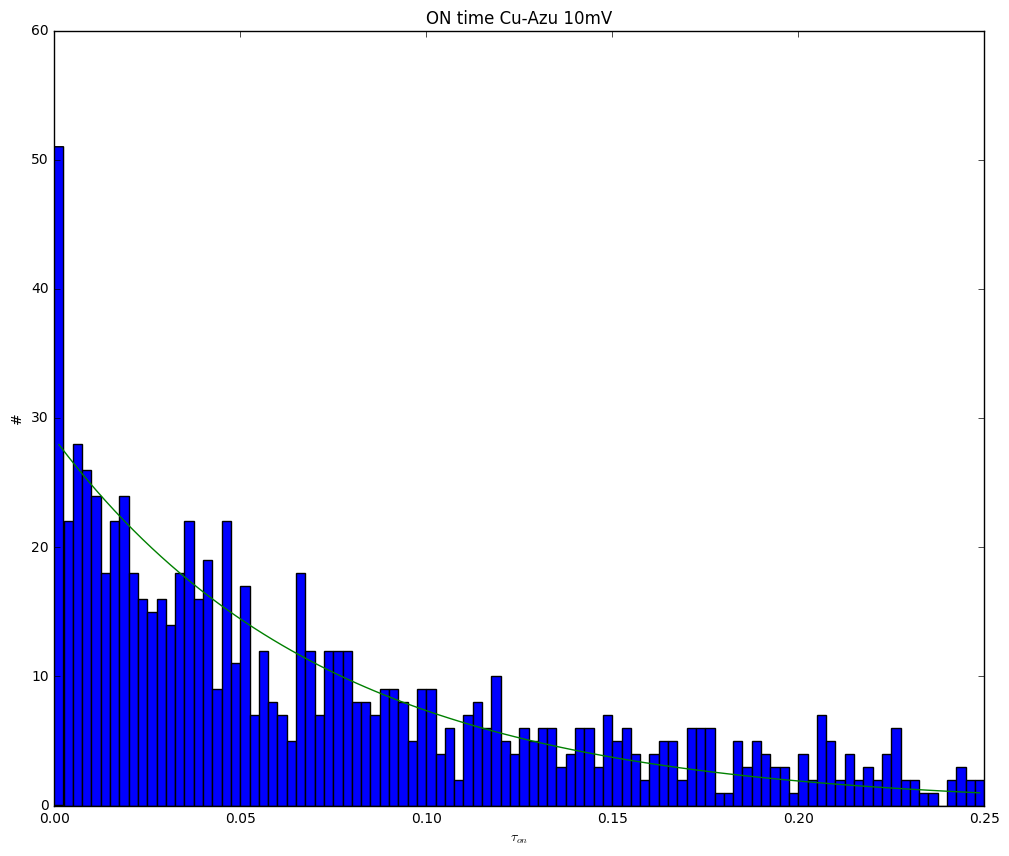

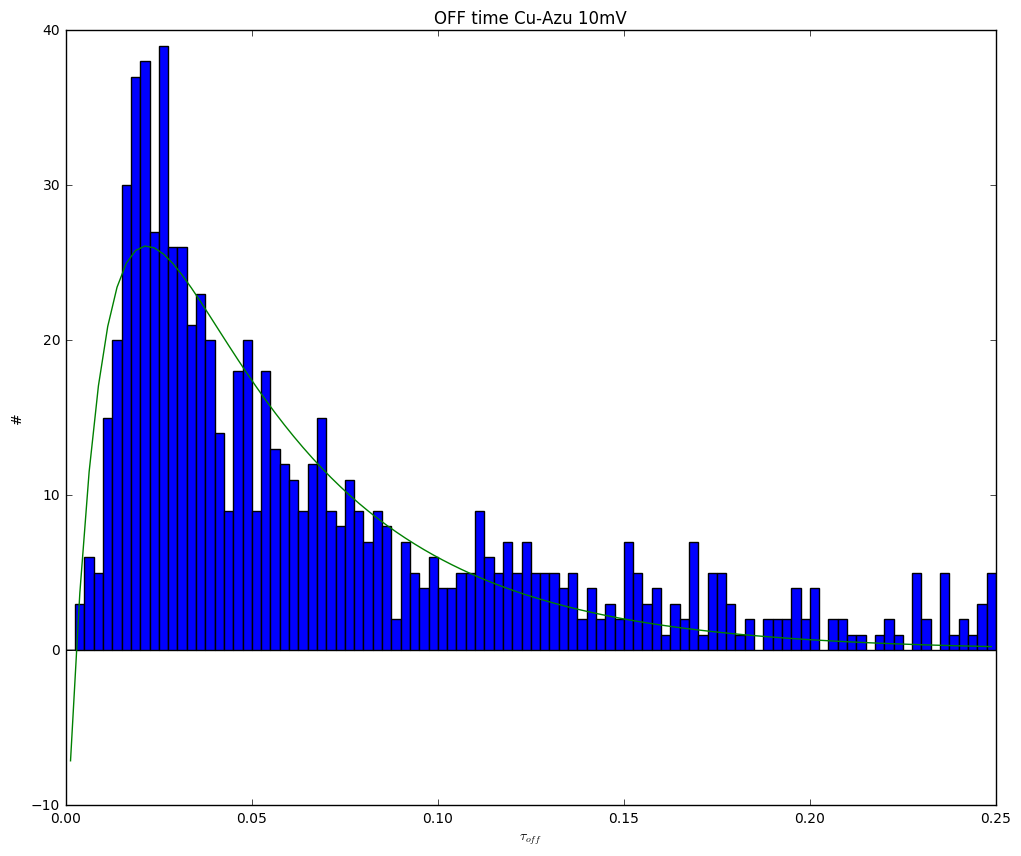

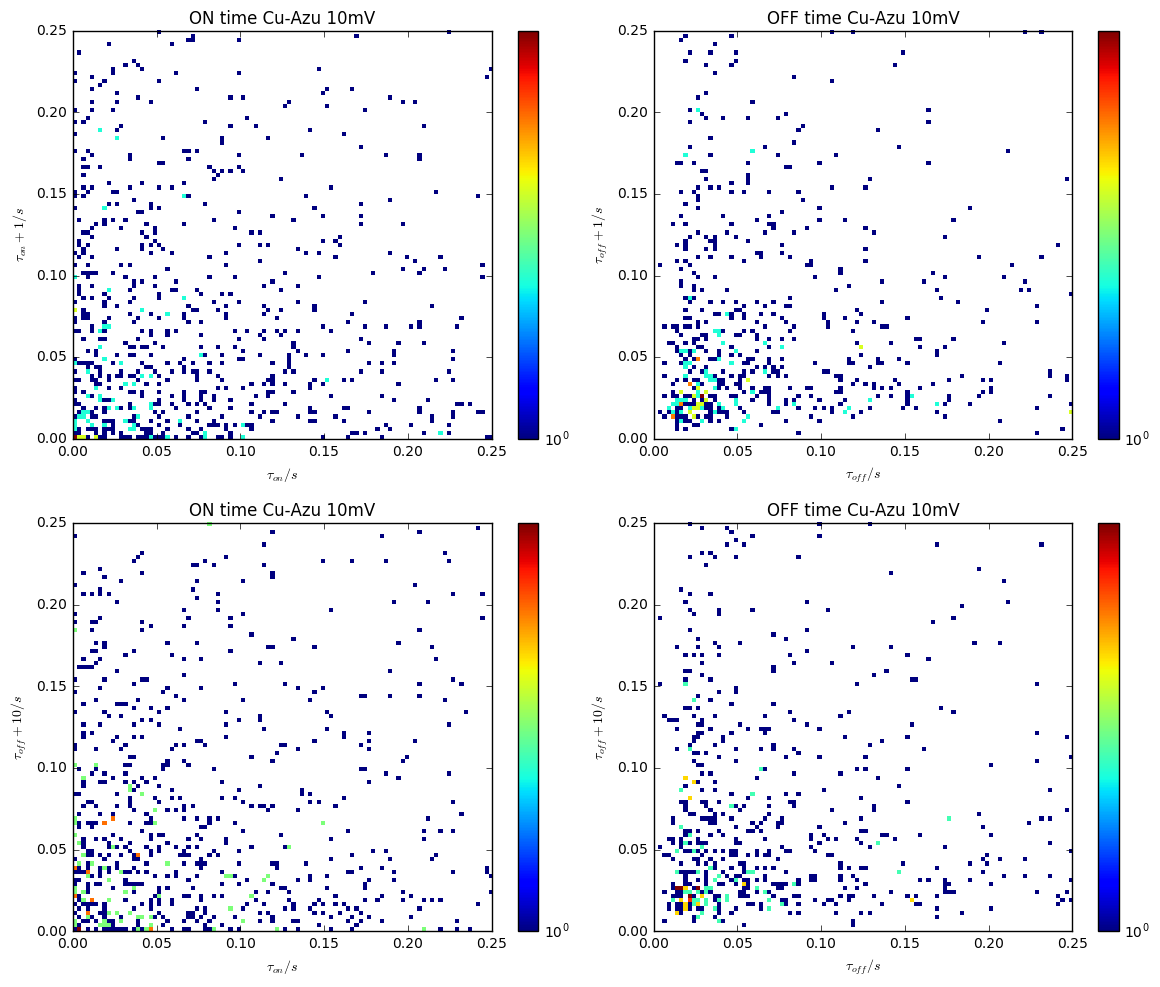

In [8]:
#*************Analysis for a specific potential********************

titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 10 #the specific potential you want the plots for
onMax=0.25;offMax=0.25;
rnge_on = [[0,onMax], [0,onMax]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,offMax], [0,offMax]] #range off histograms
bins_on = 100  #bins for the on histograms
bins_off = 100 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
current_dir = directory#'S101d14Feb17_60.5_635_A2_CuAzu655' #foldername you want to work in.
max_his_on = onMax
max_his_off = offMax
x_shift = 10 # t vs  t + x_shift 

histograms(titel, pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off, proteins, current_dir, max_his_on, max_his_off, x_shift)

## Time trace plot

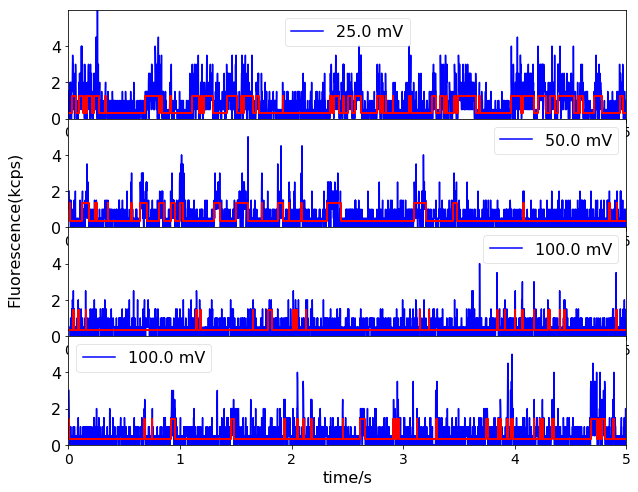

In [30]:
fig = time_trace_plot(foldername= S104d21Feb17_A2_Cu, input_potential=[25, 50, 100], pointnumbers=[4], x_lim_min=0, y_lim_min=0, x_lim_max=5, y_lim_max=6, bin=2, show_changepoint=True)

## FCS plot

(7.160830801633784, 2.4327158918245528, 2.9435540852504212)

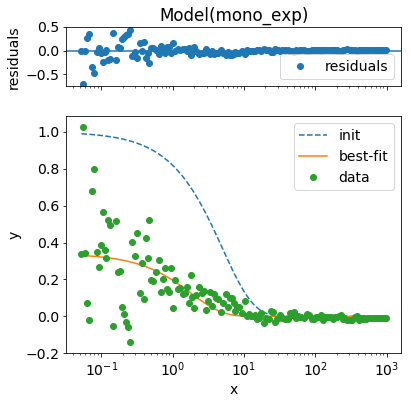

In [32]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= S104d21Feb17_A2_Cu, input_potential=[100], pointnumbers=[4])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.05,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    ydata= ((ydata)/correction_BG)
    def mono_exp(x, A, t_ac, t_rise):
        return A*exp(-x/t_ac)
    gmodel = Model(mono_exp)
    gmodel.set_param_hint('A', value=1, min=0.05, max=100)
    gmodel.set_param_hint('t_ac', value=5, min=1, max=100)
    gmodel.set_param_hint('t_rise', value=5, min=1, max=100)
    pars = gmodel.make_params()
    result = gmodel.fit(ydata, pars, x=xdata)#, A=1, B=1, t_ac=1
    A = result.best_values['A']
    t_ac = result.best_values['t_ac']
    toff = t_ac*(1+A); ton = t_ac*(1+(1/A));
    tratio_on_off = ton/toff
    return(ton, toff, tratio_on_off, result)#, t_on_err, t_off_err
ton, toff, tratio_on_off, result = FCS_mono_fit(df_fcs, df_emplot)
result.plot()
xscale('log')
ton, toff, tratio_on_off

## Time trace output folderwise

In [33]:
out_total = timetrace_outputs_folderwise(folderpath=S104d20Feb17_A1_Cu, pointnumbers=range(50), potentialist=potentialist)
out_total

Point_1                                                           \
   Potential t_ratio_timetrace                                          
   Potential            t_onav t_onaverr t_offav t_offaverr   t_ratio   
0        0.0             41.73     11.41   48.38      13.30  0.862547   
1       20.0             40.39     10.71   73.25      19.52  0.551399   
2       25.0             47.14     12.96   94.02      25.97  0.501383   
3       40.0             25.59      7.23  124.62      35.40  0.205344   
4       50.0             35.75     10.38  122.49      35.75  0.291861   
5       50.0             38.64     12.39  147.57      47.65  0.261842   
6       60.0             19.37      5.35  124.82      34.65  0.155183   
7       75.0             10.46      4.31  292.21     121.78  0.035796   
8       80.0              7.16      2.49  216.84      75.90  0.033020   
9      100.0              5.57      3.17  548.43     318.38  0.010156   
10       NaN               NaN       NaN     NaN        NaN       NaN   
11       NaN               NaN       NaN     NaN        NaN       NaN   

                Point_2                                ...      \
              Potential t_ratio_timetrace              ...       
   t_ratioerr Potential            t_onav t_onaverr    ...       
0    0.334435       0.0             19.51      3.74    ...       
1    0.207290      20.0             32.59      7.18    ...       
2    0.195398      25.0             18.75      4.92    ...       
3    0.082270      40.0             71.20     38.14    ...       
4    0.120155      50.0             21.82      5.72    ...       
5    0.119154      50.0             28.67      7.52    ...       
6    0.060769      60.0             30.77      8.79    ...       
7    0.020979      70.0             17.85      6.22    ...       
8    0.016292      75.0             15.14      6.01    ...       
9    0.008257      80.0             12.28      8.98    ...       
10        NaN     100.0              8.84      3.49    ...       
11        NaN       NaN               NaN       NaN    ...       

            Point_23                       Point_24                    \
   t_ratio_timetrace                      Potential t_ratio_timetrace   
          t_offaverr   t_ratio t_ratioerr Potential            t_onav   
0             113.86  0.605983   0.405892      50.0             88.24   
1             742.76  0.950804   1.411024      75.0             84.03   
2             272.43  1.019982   1.020960     100.0             32.77   
3             601.30  0.347478   0.403713       NaN               NaN   
4             570.96  0.234652   0.256465       NaN               NaN   
5             546.98  0.165761   0.174583       NaN               NaN   
6             959.00  0.064169   0.079910       NaN               NaN   
7                NaN       NaN        NaN       NaN               NaN   
8                NaN       NaN        NaN       NaN               NaN   
9                NaN       NaN        NaN       NaN               NaN   
10               NaN       NaN        NaN       NaN               NaN   
11               NaN       NaN        NaN       NaN               NaN   

                                                      
                                                      
   t_onaverr t_offav t_offaverr   t_ratio t_ratioerr  
0      36.57  221.16      92.70  0.398987   0.235182  
1      58.51  649.74     467.23  0.129329   0.129454  
2      22.82  762.59     548.38  0.042972   0.043016  
3        NaN     NaN        NaN       NaN        NaN  
4        NaN     NaN        NaN       NaN        NaN  
5        NaN     NaN        NaN       NaN        NaN  
6        NaN     NaN        NaN       NaN        NaN  
7        NaN     NaN        NaN       NaN        NaN  
8        NaN     NaN        NaN       NaN        NaN  
9        NaN     NaN        NaN       NaN        NaN  
10       NaN     NaN        NaN       NaN        NaN  
11       NaN     NaN        NaN       NaN        NaN